In [ ]:
!pip install chess

     |████████████████████████████████| 147 kB 4.1 MB/s 


In [30]:
import chess
import chess.engine
import chess.svg
import time
from IPython.display import SVG, display

## Evaluation

In [31]:
# Value of piece position
pawntable = [
    0, 0, 0, 0, 0, 0, 0, 0,
    5, 10, 10, -20, -20, 10, 10, 5,
    5, -5, -10, 0, 0, -10, -5, 5,
    0, 5, 10, 20, 20, 10, 5, 0,
    5, 5, 10, 25, 25, 10, 5, 5,
    10, 10, 20, 30, 30, 20, 10, 10,
    50, 50, 50, 50, 50, 50, 50, 50,
    90, 90, 90, 90, 90, 90, 90, 90]

knightstable = [
    -50, -40, -30, -30, -30, -30, -40, -50,
    -40, -20, 0, 5, 5, 0, -20, -40,
    -30, 5, 10, 15, 15, 10, 5, -30,
    -30, 0, 15, 20, 20, 15, 0, -30,
    -30, 5, 15, 20, 20, 15, 5, -30,
    -30, 0, 10, 15, 15, 10, 0, -30,
    -40, -20, 0, 0, 0, 0, -20, -40,
    -50, -40, -30, -30, -30, -30, -40, -50]

bishopstable = [
    -20, -10, -10, -10, -10, -10, -10, -20,
    -10, 10, 0, 0, 0, 0, 10, -10,                  
    -15, 10, 10, 10, 10, 10, 10, -15,
    -10, 0, 10, 10, 10, 10, 0, -10,
    -10, 5, 5, 10, 10, 5, 5, -10,
    -10, 0, 5, 10, 10, 5, 0, -10,
    -10, 0, 0, 0, 0, 0, 0, -10,
    -20, -10, -10, -10, -10, -10, -10, -20]   # 5 ,5, -10, -10

rookstable = [
    0, 0, 0, 5, 5, 0, 0, 0,
    -5, 0, 0, 0, 0, 0, 0, -5,
    -5, 5, 5, 5, 5, 5, 5, -5,
    -5,5, 5, 5, 5, 5, 5, -5,
    -5, 5, 5, 5, 5, 5, 5, -5,
    -5, 5, 5, 5, 5, 5, 5, -5,
    5, 10, 10, 10, 10, 10, 10, 5,
    5, 5, 0, 0, 0, 0, 5, 5]

queenstable = [
    -20, -10, -10, -5, -5, -10, -10, -20,
    -10, 0, 0, 0, 0, 0, 0, -10,
    -10, 5, 5, 5, 5, 5, 0, -10,
    0, 0, 5, 5, 5, 5, 0, -5,
    -5, 0, 5, 5, 5, 5, 0, -5,
    -10, 0, 5, 5, 5, 5, 0, -10,
    -10, 0, 0, 0, 0, 0, 0, -10,
    -20, -10, -10, -5, -5, -10, -10, -20]

kingstable = [
    20, 30, 10, 0, 0, 10, 30, 20,
    20, 20, 0, 0, 0, 0, 20, 20,
    -10, -20, -20, -20, -20, -20, -20, -10,
    -20, -30, -30, -40, -40, -30, -30, -20,
    -30, -40, -40, -50, -50, -40, -40, -30,
    -30, -40, -40, -50, -50, -40, -40, -30,
    -30, -40, -40, -50, -50, -40, -40, -30,
    -30, -40, -40, -50, -50, -40, -40, -30]

In [32]:

# Stockfish evaluation
def stockfish_eval(board_instance, depth):
    move = chess.engine.analyse(board, chess.engine.Limit(time=0.01))
    # print(move)
    return chess.engine.PovScore(move['score'], chess.BLACK).pov(chess.BLACK).relative.score()

# Self-defined static evaluation
def Static_Evaluation(current_board):
  i = 0
  evaluation = 0
  x = True
  try:
    x = bool(current_board.piece_at(i).holder)
  except AttributeError as e:
    x = x
  while i < 63: 
    evaluation = evaluation + (get_piece_val(str(current_board.piece_at(i))) if x else -get_piece_val(str(current_board.piece_at(i))))
  return evaluation

def get_piece_val(piece):
  if(piece == None):
      return 0
  value = 0
  if piece == "P" or piece == "p":
      value = 10
  if piece == "N" or piece == "n":
      value = 30
  if piece == "B" or piece == "b":
      value = 30
  if piece == "R" or piece == "r":
      value = 50
  if piece == "Q" or piece == "q":
      value = 90
  if piece == 'K' or piece == 'k':
      value = 900
  #value = value if (board.piece_at(place)).color else -value
  return value

# Minh's evalution case
def material_point(board):
    # Pawn difference = # of white pawns - # of black pawns
    pawn_diff = len(board.pieces(chess.PAWN, chess.WHITE)) - len(board.pieces(chess.PAWN, chess.BLACK))
    # Knight difference = # of white knight - # of black knight
    knight_diff = len(board.pieces(chess.KNIGHT, chess.WHITE)) - len(board.pieces(chess.KNIGHT, chess.BLACK))
    # Bishop difference = # of white bishop - # of black bishop
    bishop_diff = len(board.pieces(chess.BISHOP, chess.WHITE)) - len(board.pieces(chess.BISHOP, chess.BLACK))
    # Rook difference = # of white rook - # of black rook
    rook_diff = len(board.pieces(chess.ROOK, chess.WHITE)) - len(board.pieces(chess.ROOK, chess.BLACK))
    # Queen difference = # of white queen - # of black queen
    queen_diff = len(board.pieces(chess.QUEEN, chess.WHITE)) - len(board.pieces(chess.QUEEN, chess.BLACK))
    return 100*pawn_diff + 320*knight_diff + 330*bishop_diff + 500*rook_diff + 900*queen_diff

def position_point(board):
    # pawn_pos = pawn_white_point + pawn_black_point
    pawn_pos = sum([pawntable[i] for i in board.pieces(chess.PAWN, chess.WHITE)]) + sum([-pawntable[chess.square_mirror(i)] for i in board.pieces(chess.PAWN, chess.BLACK)])
    # knight_pos = knight_white_point + knight_black_point
    knight_pos = sum([knightstable[i] for i in board.pieces(chess.KNIGHT, chess.WHITE)]) + sum([-knightstable[chess.square_mirror(i)] for i in board.pieces(chess.KNIGHT, chess.BLACK)])
    # bishop_pos = bishop_white_point + bishop_black_point
    bishop_pos = sum([bishopstable[i] for i in board.pieces(chess.BISHOP, chess.WHITE)]) + sum([-bishopstable[chess.square_mirror(i)] for i in board.pieces(chess.BISHOP, chess.BLACK)])
    # rook_pos = rook_white_point + rook_black_point
    rook_pos = sum([rookstable[i] for i in board.pieces(chess.ROOK, chess.WHITE)]) + sum([-rookstable[chess.square_mirror(i)] for i in board.pieces(chess.ROOK, chess.BLACK)])
    # queen_pos = queen_white_point + queen_black_point
    queen_pos = sum([queenstable[i] for i in board.pieces(chess.QUEEN, chess.WHITE)]) + sum([-queenstable[chess.square_mirror(i)] for i in board.pieces(chess.QUEEN, chess.BLACK)])
    # king_pos = king_white_point + king_black_point
    king_pos = sum([kingstable[i] for i in board.pieces(chess.KING, chess.WHITE)]) + sum([-kingstable[chess.square_mirror(i)] for i in board.pieces(chess.KING, chess.BLACK)])
    return pawn_pos + knight_pos + bishop_pos + rook_pos + queen_pos + king_pos

def evaluatePoint(board, depth):
  evaluate_point = material_point(board) + position_point(board)
  return evaluate_point


## Search algorithm

### Alpha-beta pruning

In [33]:
# alpha-beta pruning algorithm
def alpha_beta(current_board, max_depth, current_depth, isMax, alpha, beta, nodes_per_depth):
    # counting numnber of nodes for analysing
    if max_depth - current_depth in nodes_per_depth:
        nodes_per_depth[max_depth - current_depth] += 1
    else:
        nodes_per_depth[max_depth - current_depth] = 1
    
    # The stop case: king is captured or draw play once
    # case: check-mate
    if current_board.is_checkmate():
        if isMax:
          return -10000
        else:
          return 10000
    
    # case: draw once
    if current_board.is_stalemate():
        return 0

    # case: Terminal node: Game over
    if current_board.is_insufficient_material():
        return 0

    # case: find till the last children
    if current_depth == 0:
        return evaluatePoint(current_board, current_depth)

    # Backtrack and find children
    if isMax:
        # set high negative
        best_score = -10000

        for legal_move in current_board.legal_moves:
            move = chess.Move.from_uci(str(legal_move))
            current_board.push(move)
            node_score = alpha_beta(current_board, max_depth, current_depth-1, False, alpha, beta, nodes_per_depth)
            best_score = max(best_score, node_score)
            current_board.pop()
            # calculate alpha for Max node
            alpha = max(alpha, best_score)
            # pruning
            if beta <= alpha:
                return best_score
        return best_score

    else:
        best_score = 10000

        for legal_move in current_board.legal_moves:
            move = chess.Move.from_uci(str(legal_move))
            current_board.push(move)
            node_score = alpha_beta(current_board, max_depth, current_depth-1, True, alpha, beta, nodes_per_depth)
            best_score = min(best_score, node_score)
            current_board.pop()
            # calculate beta for Min node
            beta = min(beta, best_score)
            # pruning
            if beta <= alpha:
              return best_score
        return best_score

## Find best move

In [34]:
def findBestMove(current_board, depth, isMax, alpha, beta):
  if current_board.is_checkmate():
    return chess.Move.null()

  best_move = chess.Move.null()
  nodes_per_depth = dict()

  start = time.time()
  if isMax:
    best_score = -10000
    for legal_move in current_board.legal_moves:
      move = chess.Move.from_uci(str(legal_move))
      current_board.push(move)
      move_score = alpha_beta(current_board, depth, depth, False, alpha, beta, nodes_per_depth)
      score = max(best_score, move_score)
      current_board.pop()
      if score > best_score:
        best_score = score
        best_move = move
    end = time.time()
    print("Time: {} s".format(end-start))
    return best_move
  else:
    best_score = 10000
    for legal_move in current_board.legal_moves:
      move = chess.Move.from_uci(str(legal_move))
      current_board.push(move)
      move_score = alpha_beta(current_board, depth, depth, True, alpha, beta, nodes_per_depth)
      score = min(best_score, move_score)
      current_board.pop()
      if score < best_score:
        best_score = score
        best_move = move
    end = time.time()
    print("Time: {} s".format(end - start))
    return best_move


## Machine - Machine

# BLACK is MAX, WHITE is MIN

In [35]:
def game_between_two_computer(depth=3):
    board = chess.Board()
    
    for n in range(0,10):
        start = time.time()
        if n%2 == 0:
            print("WHITE Turn")
            move = findBestMove(board, depth, False, -10000, 10000)
        else: 
            print("BLACK Turn")
            move = findBestMove(board, depth, True, -10000, 10000)
        end = time.time()
        
        print("Move in UCI format:", move)
        # print("Nodes per depth:", nodes_per_depth)
        print("Time taken by Move:", end-start)
        board.push(move)
        display(SVG(chess.svg.board(board, size=400)))  
        print("\n")

In [36]:
board = chess.Board()

## Chess Board Representation before best move¶

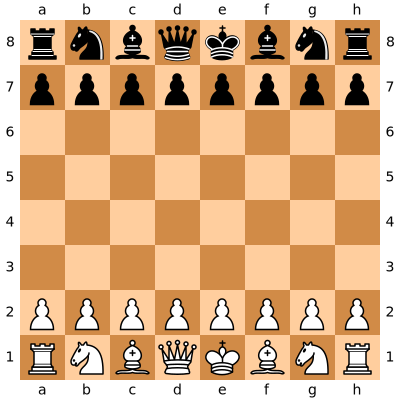

In [37]:
board

### WHITE move

In [38]:
move = findBestMove(board, 3, True, -10000, 10000)

Time: 1.836256980895996 s


In [39]:
move

Move.from_uci('g1f3')

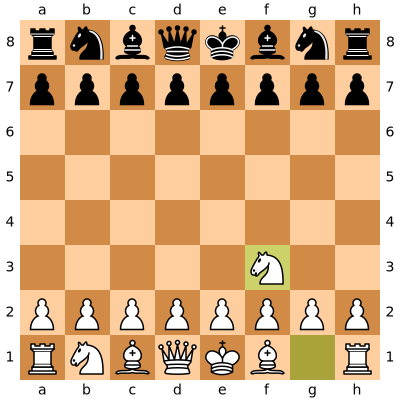

In [40]:
board.push(move)
board

Time: 3.3447084426879883 s


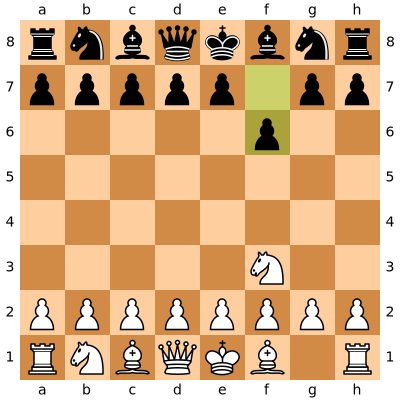

In [41]:
move = findBestMove(board, 3, True, -10000, 10000)
move
board.push(move)
board


WHITE Turn
Time: 3.6264357566833496 s
Move in UCI format: f2f3
Time taken by Move: 3.627880334854126


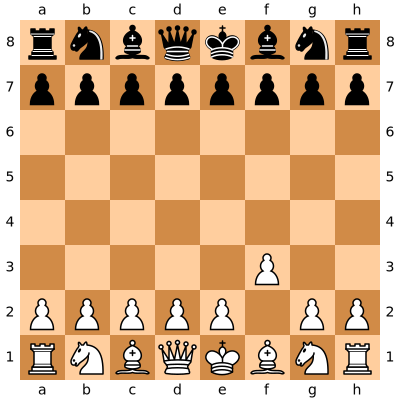



BLACK Turn
Time: 3.4146101474761963 s
Move in UCI format: f7f6
Time taken by Move: 3.415391206741333


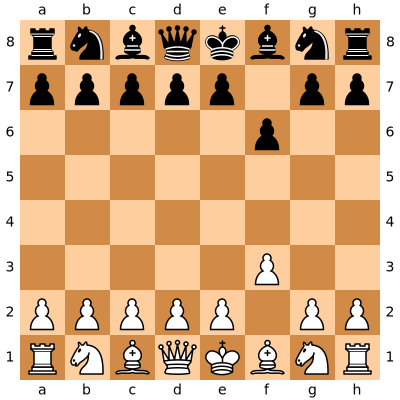



WHITE Turn
Time: 3.302704334259033 s
Move in UCI format: g2g3
Time taken by Move: 3.3048458099365234


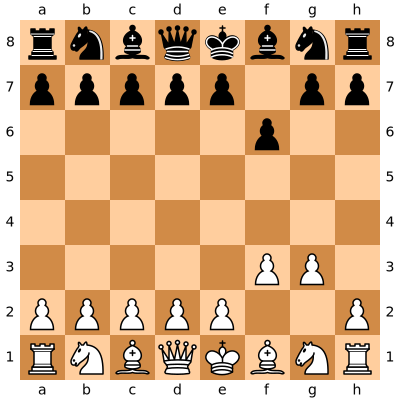



BLACK Turn
Time: 3.903918981552124 s
Move in UCI format: g7g6
Time taken by Move: 3.9046502113342285


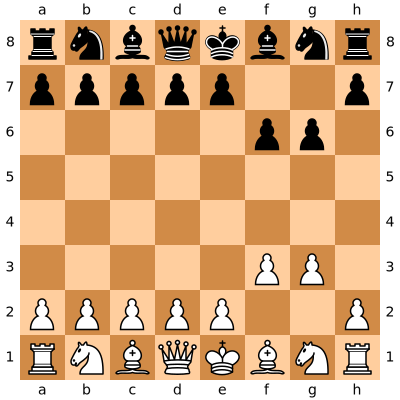



WHITE Turn
Time: 3.7407758235931396 s
Move in UCI format: c2c3
Time taken by Move: 3.741583824157715


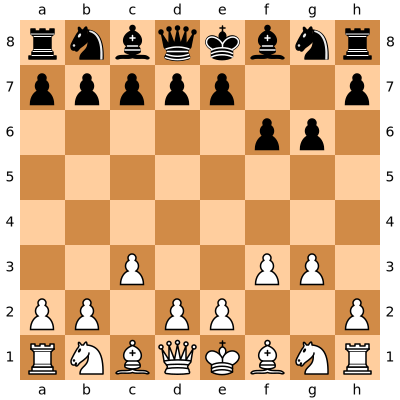



BLACK Turn
Time: 4.135456085205078 s
Move in UCI format: c7c6
Time taken by Move: 4.1365602016448975


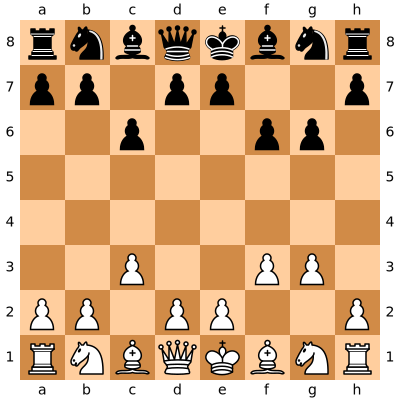



WHITE Turn
Time: 3.7731528282165527 s
Move in UCI format: f1h3
Time taken by Move: 3.773390293121338


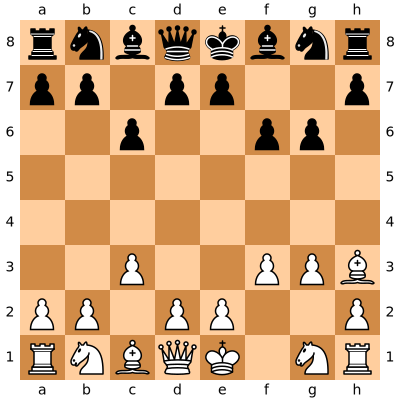



BLACK Turn
Time: 4.893542528152466 s
Move in UCI format: f8h6
Time taken by Move: 4.893770933151245


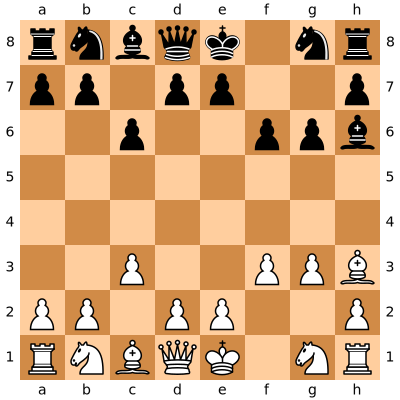



WHITE Turn
Time: 6.724312782287598 s
Move in UCI format: d1b3
Time taken by Move: 6.7250964641571045


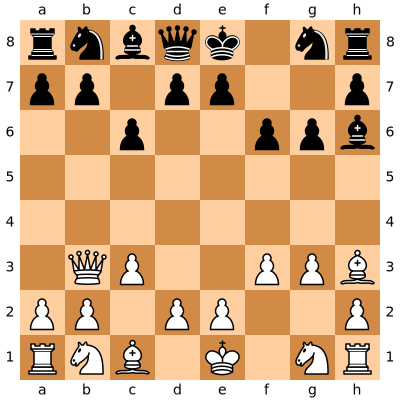



BLACK Turn
Time: 4.849090814590454 s
Move in UCI format: d8c7
Time taken by Move: 4.849319696426392


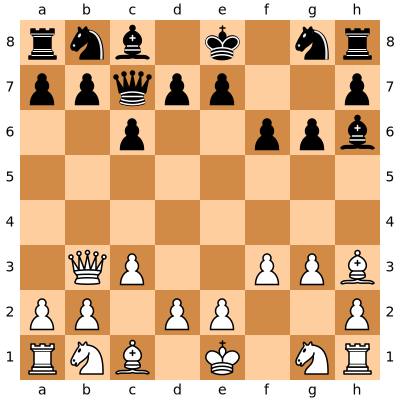

In [42]:
game_between_two_computer(3)